In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from scipy.stats import norm, zscore, multivariate_normal
import math
import transmorph as tr

In [2]:
xs = np.loadtxt('datasets/pdx352.csv', delimiter=',')
yt = np.loadtxt('datasets/chla9.csv', delimiter=',')

# Optimal transport

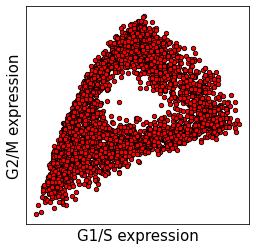

In [3]:
plt.figure( figsize=(4,4) )
plt.scatter(*yt.T, c='r', s=20, ec='k', linewidth=.8)
plt.xticks([])
plt.yticks([])
plt.xlabel("G1/S expression", size=15)
plt.ylabel("G2/M expression", size=15)
plt.savefig("CHLA9_cc.png")

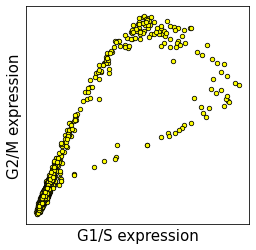

In [4]:
plt.figure( figsize=(4,4) )
plt.scatter(*xs.T, s=20, ec='k', c='yellow', linewidth=.8)
plt.xticks([])
plt.yticks([])
plt.xlabel("G1/S expression", size=15)
plt.ylabel("G2/M expression", size=15)
plt.savefig("PDX352_cc.png")

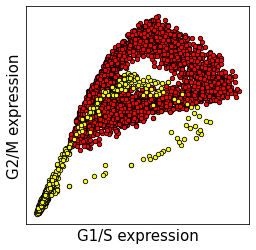

In [5]:
plt.figure( figsize=(4,4) )
plt.scatter(*yt.T, c='r', s=20, ec='k', linewidth=.8)
plt.scatter(*xs.T, s=20, ec='k', c='yellow', linewidth=.8)
plt.xticks([])
plt.yticks([])
plt.xlabel("G1/S expression", size=15)
plt.ylabel("G2/M expression", size=15)
plt.savefig("CHLA9_PDX352_cc.png")

In [6]:
w_weighted = tr.Transmorph(method='ot', verbose=2)
w_unweighted = tr.Transmorph(method='ot', weighted=False, verbose=2)

(Transmorph) > Successfully initialized.
(Transmorph) > <Transmorph> ot-based.
        -- fitted: False
        -- max_iter: 1000000
        -- entropy: False
        -- hreg: 0.001
        -- weighted: True
        -- metric: sqeuclidean
        -- n_comps: -1
        -- subsampling: -1
        -- normalize: True
        -- n_integrations: 0
(Transmorph) > Successfully initialized.
(Transmorph) > <Transmorph> ot-based.
        -- fitted: False
        -- max_iter: 1000000
        -- entropy: False
        -- hreg: 0.001
        -- weighted: False
        -- metric: sqeuclidean
        -- n_comps: -1
        -- subsampling: -1
        -- normalize: True
        -- n_integrations: 0


In [7]:
xt_unweighted = w_unweighted.fit_transform(xs, yt) # Equal weights
xt_weighted = w_weighted.fit_transform(xs, yt) # Density correction

(Transmorph) > Computing normalized view...
(Transmorph) > Using metric sqeuclidean as a cost for Mxy. Normalization: True
(Transmorph) > Computing transport plan (ot)...
(Transmorph/TData) > Using uniform weights.
(Transmorph/TData) > Using uniform weights.
(Transmorph) > Transmorph fitted.
(Transmorph) > Projecting dataset...
(Transmorph) > Terminated.
(Transmorph) > Computing normalized view...
(Transmorph) > Using metric sqeuclidean as a cost for Mxy. Normalization: True
(Transmorph) > Computing transport plan (ot)...
(Transmorph/TData) > Starting the weights selection procedure.
(Transmorph/TData) > Searching for sigma... Found: 0.000338
(Transmorph/TData) > Solving the QP to find weights... Done.
(Transmorph/TData) > Starting the weights selection procedure.
(Transmorph/TData) > Searching for sigma... Found: 0.001906
(Transmorph/TData) > Solving the QP to find weights... Done.
(Transmorph) > Transmorph fitted.
(Transmorph) > Projecting dataset...
(Transmorph) > Terminated.


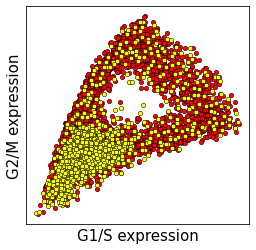

In [8]:
plt.figure( figsize=(4,4) )
plt.scatter(*yt.T, s=20, c='red', ec='k', linewidth=.5)
plt.scatter(*xt_weighted.T, s=20, c='yellow', ec='k', linewidth=.5)
plt.xticks([])
plt.yticks([])
plt.xlabel("G1/S expression", size=15)
plt.ylabel("G2/M expression", size=15)
plt.savefig("CHLA9_integrated.png")

In [9]:
distances_s = np.diag(xs @ xs.T)**(1/32)
distances_s = (distances_s - distances_s.min())/(distances_s.max() - distances_s.min())
distances_t = np.diag(yt @ yt.T)**(1/32)
distances_t = (distances_t - distances_t.min())/(distances_t.max() - distances_t.min())

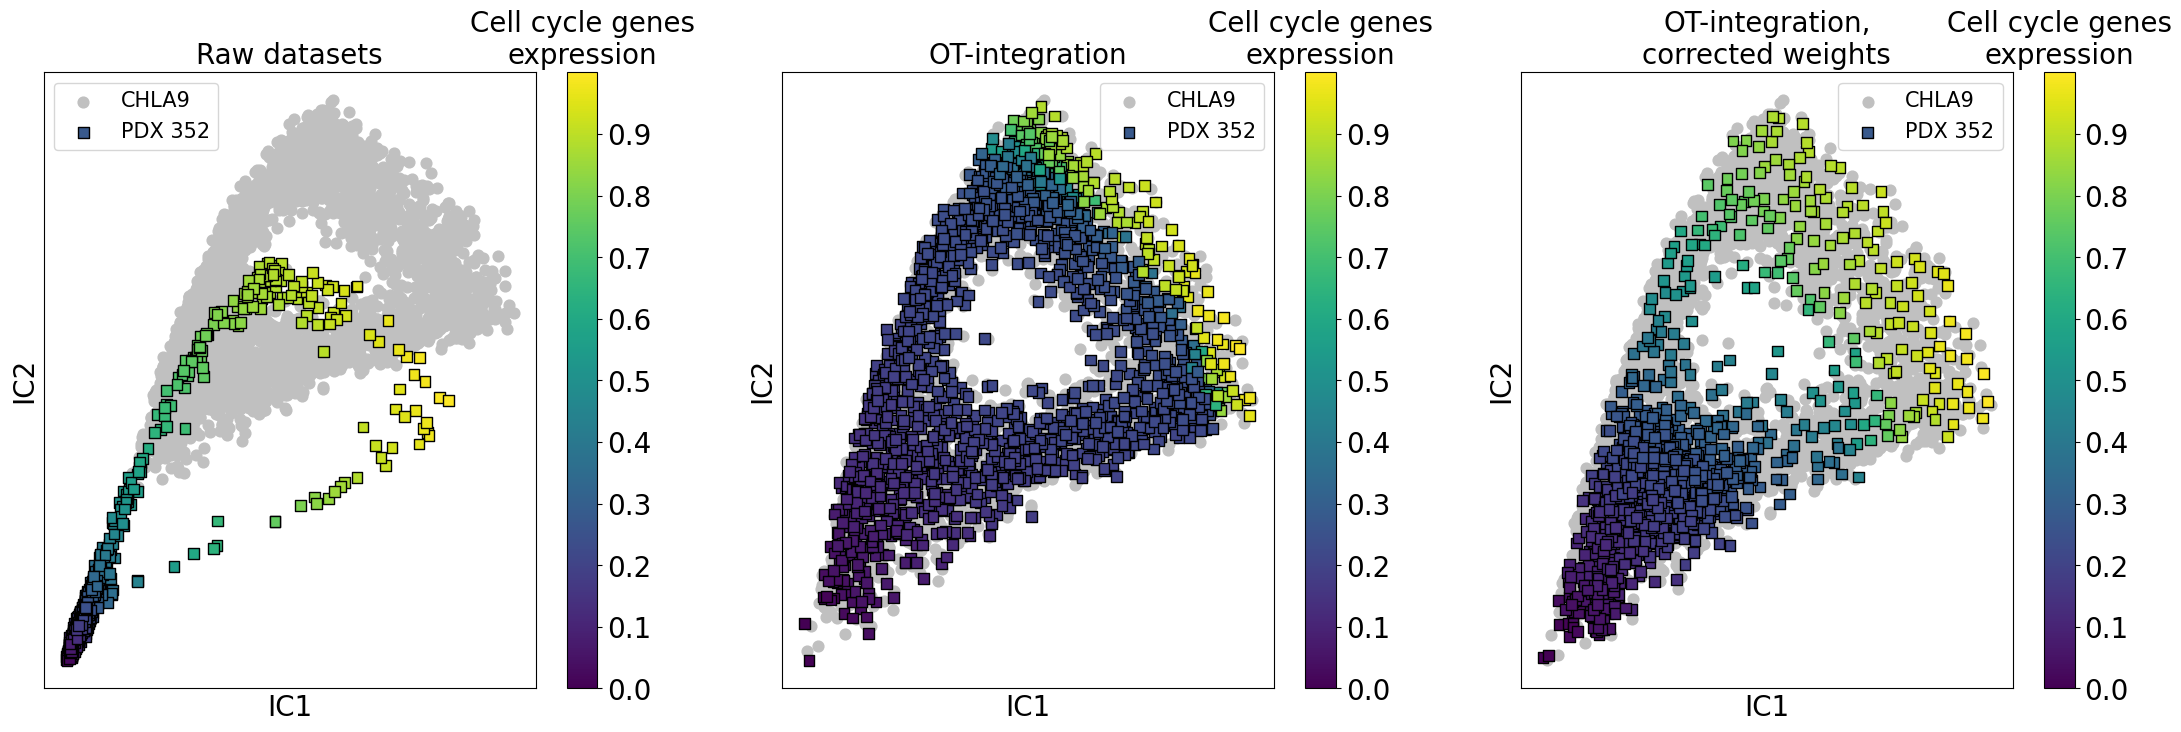

In [10]:
# Optimal transport

plt.style.use('default')

plt.figure(figsize=(27,8))

plt.subplot(1,3,1)
plt.scatter(*yt.T, s=60, c='silver', label='CHLA9')
plt.scatter(*xs.T, s=60, c=distances_s, cmap='viridis', ec='k', label='PDX 352', marker='s')
plt.xlabel("IC1", fontsize=20)
plt.ylabel("IC2", fontsize=20)
plt.xticks([])
plt.yticks([])
plt.legend(fontsize=15)
plt.title('Raw datasets', fontsize=20)
cbar = plt.colorbar()
cbar.set_ticks( (np.arange(10))/10 )
cbar.ax.tick_params(labelsize=20)
cbar.ax.set_title('Cell cycle genes\nexpression', fontsize=20)

plt.subplot(1,3,2)
plt.scatter(*yt.T, s=60, c='silver', label='CHLA9')
plt.scatter(*xt_unweighted.T, s=60, c=distances_s, cmap='viridis', ec='k', label='PDX 352', marker='s')
plt.xlabel("IC1", fontsize=20)
plt.ylabel("IC2", fontsize=20)
plt.xticks([])
plt.yticks([])
plt.legend(fontsize=15)
plt.title('OT-integration', fontsize=20)
cbar = plt.colorbar()
cbar.set_ticks( (np.arange(10))/10 )
cbar.ax.tick_params(labelsize=20)
cbar.ax.set_title('Cell cycle genes\nexpression', fontsize=20)

plt.subplot(1,3,3)
plt.scatter(*yt.T, s=60, c='silver', label='CHLA9')
plt.scatter(*xt_weighted.T, s=60, c=distances_s, cmap='viridis', ec='k', label='PDX 352', marker='s')
plt.xlabel("IC1", fontsize=20)
plt.ylabel("IC2", fontsize=20)
plt.xticks([])
plt.yticks([])
plt.legend(fontsize=15)
plt.title('OT-integration,\ncorrected weights', fontsize=20)
cbar = plt.colorbar()
cbar.set_ticks( (np.arange(10))/10 )
cbar.ax.tick_params(labelsize=20)
cbar.ax.set_title('Cell cycle genes\nexpression', fontsize=20)

pass

In [11]:
distances_stu = w_unweighted.label_transfer(distances_t)
distances_stw = w_weighted.label_transfer(distances_t)

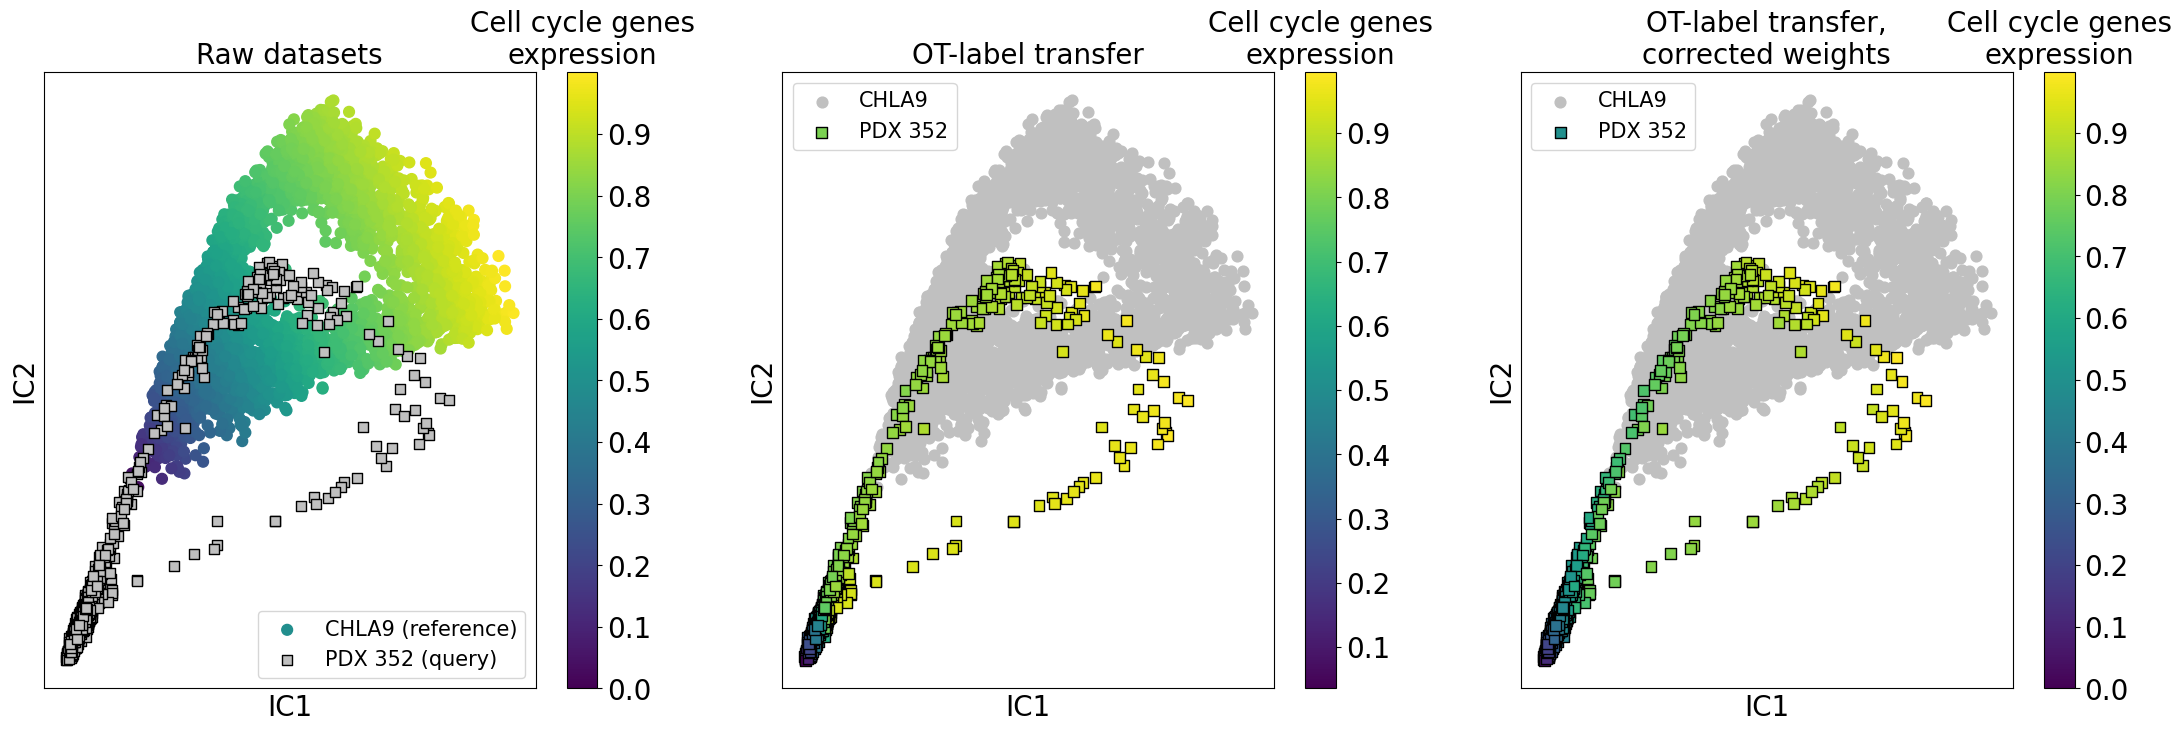

In [12]:
# Optimal transport

plt.style.use('default')

plt.figure(figsize=(27,8))

plt.subplot(1,3,1)
plt.scatter(*yt.T, s=60, c=distances_t, label='CHLA9 (reference)')
plt.scatter(*xs.T, s=60, c='silver', cmap='viridis', ec='k', label='PDX 352 (query)', marker='s')
plt.xlabel("IC1", fontsize=20)
plt.ylabel("IC2", fontsize=20)
plt.xticks([])
plt.yticks([])
plt.legend(fontsize=15)
plt.title('Raw datasets', fontsize=20)
cbar = plt.colorbar()
cbar.set_ticks( (np.arange(10))/10 )
cbar.ax.tick_params(labelsize=20)
cbar.ax.set_title('Cell cycle genes\nexpression', fontsize=20)

plt.subplot(1,3,2)
plt.scatter(*yt.T, s=60, c='silver', label='CHLA9')
plt.scatter(*xs.T, s=60, c=distances_stu, cmap='viridis', ec='k', label='PDX 352', marker='s')
plt.xlabel("IC1", fontsize=20)
plt.ylabel("IC2", fontsize=20)
plt.xticks([])
plt.yticks([])
plt.legend(fontsize=15)
plt.title('OT-label transfer', fontsize=20)
cbar = plt.colorbar()
cbar.set_ticks( (np.arange(10))/10 )
cbar.ax.tick_params(labelsize=20)
cbar.ax.set_title('Cell cycle genes\nexpression', fontsize=20)

plt.subplot(1,3,3)
plt.scatter(*yt.T, s=60, c='silver', label='CHLA9')
plt.scatter(*xs.T, s=60, c=distances_stw, cmap='viridis', ec='k', label='PDX 352', marker='s')
plt.xlabel("IC1", fontsize=20)
plt.ylabel("IC2", fontsize=20)
plt.xticks([])
plt.yticks([])
plt.legend(fontsize=15)
plt.title('OT-label transfer,\ncorrected weights', fontsize=20)
cbar = plt.colorbar()
cbar.set_ticks( (np.arange(10))/10 )
cbar.ax.tick_params(labelsize=20)
cbar.ax.set_title('Cell cycle genes\nexpression', fontsize=20)

pass